<a href="https://colab.research.google.com/github/ViniViniAntunes/Prevendo_Valor_de_Aluguel_em_SP/blob/master/Previsao_de_valores_de_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão do Valor de Aluguel

- Valor do aluguel na cidade de São Paulo
- A base de dados utilizada nesse projeto foi retirada do GitHub de <a href="https://github.com/LuizArmesto">Luiz Armesto</a>, onde ele descreve como foi feita a web scrapping de um site de classificados.
- O dataset contém dezenas de milhares de apartamentos disponíveis para locação na cidade de São Paulo, com os valores do aluguel, área do apartamento, quantidade de quartos, de suites e de vagas na garagem e o bairro em que o apartamento se localiza.

---
# 0.0 Importando algumas bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 0.1 Carregando a base de dados

In [2]:
# Link do dataset
url = 'https://github.com/LuizArmesto/notebooks/blob/master/regressao_linear/apartamentos_alugar_sao_paulo.csv?raw=true'

# Criando um DataFrame
data = pd.read_csv(url)

# Mostrando as 5 primeiras linhas do DataFrame
data.head()

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
0,1600,57,2,0,1,1,VL DA SAUDE,Sao Paulo,1,3,9165861
1,5600,143,4,1,2,2,ITAIM BIBI,Sao Paulo,1,3,8657016
2,3000,140,3,1,1,3,BROOKLIN,Sao Paulo,1,2,9245580
3,4000,70,2,1,1,4,CAMPO BELO,Sao Paulo,1,2,8788916
4,2500,80,2,1,2,5,PERDIZES,Sao Paulo,1,1,9257792


---
# 1.0 Descrição dos dados

## 1.1 Dimensão dos dados

In [3]:
# Imprimeido a quantidade de linhas e colunas do DataFrame
print(f'Número de linhas do DataFrame = {data.shape[0]}')
print(f'Número de colunas do DataFrame = {data.shape[1]}')

Número de linhas do DataFrame = 28879
Número de colunas do DataFrame = 11


## 1.2 Dados ausentes

In [4]:
# Visualizando se há dados ausentes na nosssa amostra
data.isna().sum()

valor        0
area         0
quartos      0
suites       0
vagas        0
bairro_id    0
bairro       0
cidade       0
tipo         0
subtipo      0
id           0
dtype: int64

In [5]:
# Mostrando algumas informações sobre as variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28879 entries, 0 to 28878
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   valor      28879 non-null  int64 
 1   area       28879 non-null  int64 
 2   quartos    28879 non-null  int64 
 3   suites     28879 non-null  int64 
 4   vagas      28879 non-null  int64 
 5   bairro_id  28879 non-null  int64 
 6   bairro     28879 non-null  object
 7   cidade     28879 non-null  object
 8   tipo       28879 non-null  int64 
 9   subtipo    28879 non-null  int64 
 10  id         28879 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.4+ MB


## 1.3 Estatísticas descritivas dos dados

In [6]:
# Mostrando as estatísticas das variáveis quantitativas
data.describe()

,valor,area,quartos,suites,vagas,bairro_id,tipo,subtipo,id
count,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.0,28879.000000,2.887900e+04
mean,3482.065272,98.544583,2.335780,0.880640,1.650819,46.370061,1.0,1.975830,8.333661e+06
std,2056.213285,57.918088,0.874391,0.917536,16.250424,58.712461,0.0,1.178082,1.544809e+06
min,500.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,4.542900e+04
25%,2000.000000,60.000000,2.000000,0.000000,1.000000,10.000000,1.0,1.000000,7.766744e+06
50%,2800.000000,80.000000,2.000000,1.000000,1.000000,29.000000,1.0,2.000000,8.929920e+06
75%,4500.000000,123.000000,3.000000,1.000000,2.000000,56.000000,1.0,2.000000,9.383485e+06
max,10000.000000,694.000000,8.000000,5.000000,2000.000000,449.000000,1.0,4.000000,9.645240e+06


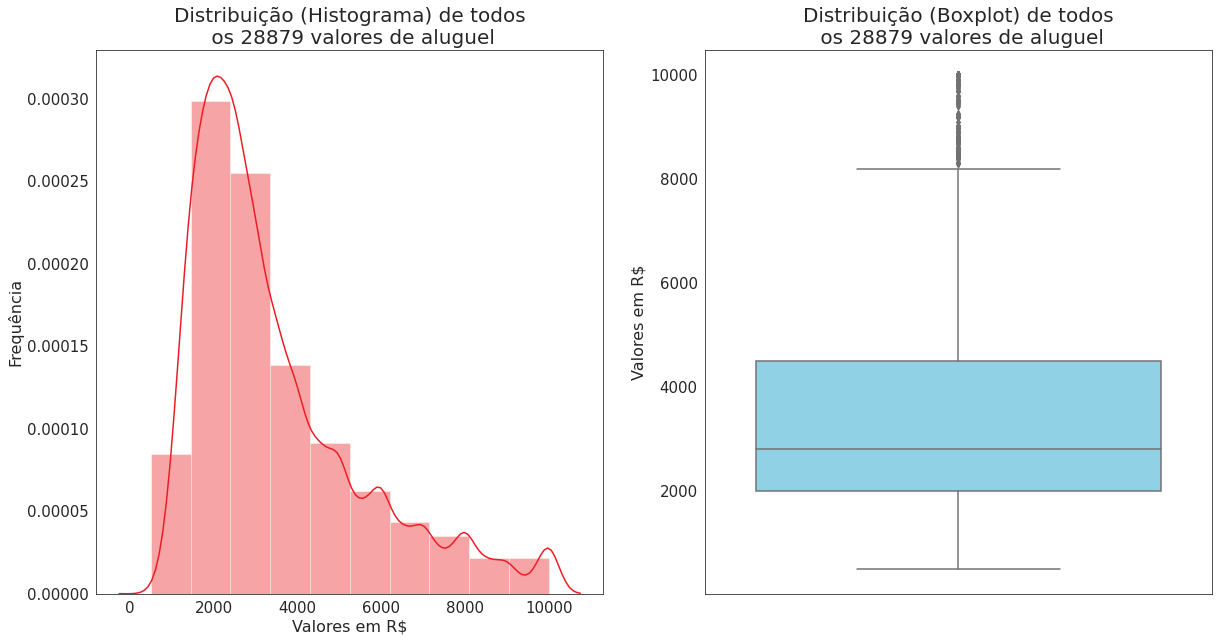

In [76]:
# Setando o tamanho da primeira figura
plt.figure(figsize=(20,10))

# Mostrando o hitograma
plt.subplot(1,2,1)
sns.distplot(data['valor'], vertical=False, bins=10, color='#ED1C24')

# Definindo o título do hitograma
linhas = data['valor'].shape[0]
plt.title(f'Distribuição (Histograma) de todos\n os {linhas} valores de aluguel', fontsize=20)

# Definindo o eixo horizontal do hitograma
plt.xlabel('Valores em R$', fontsize=16)

# Definindo o eixo vertical do hitograma
plt.ylabel("Frequência", fontsize=16)

# Mostrando o boxplot
plt.subplot(1,2,2)
sns.boxplot(data['valor'], orient='v', color='#83D8F4')

# Definindo o título do boxplot
plt.title(f'Distribuição (Boxplot) de todos\n os {linhas} valores de aluguel', fontsize=20)

# Configurado a fonte
plt.rcParams.update({'font.size': 12})

# Definindo o eixo vertical do boxplot
plt.ylabel('Valores em R$', fontsize=16)
plt.show()

In [8]:
# Imprimindo a matriz de correlação entre as variáveis
corr = data.drop('tipo', axis=1).corr().round(2)
corr

,valor,area,quartos,suites,vagas,bairro_id,subtipo,id
valor,1.00,0.69,0.43,0.62,0.03,-0.22,-0.04,-0.10
area,0.69,1.00,0.69,0.65,0.04,-0.10,-0.04,-0.11
quartos,0.43,0.69,1.00,0.54,0.04,0.01,-0.04,-0.08
suites,0.62,0.65,0.54,1.00,0.04,-0.12,-0.04,-0.09
vagas,0.03,0.04,0.04,0.04,1.00,-0.01,-0.01,-0.00
bairro_id,-0.22,-0.10,0.01,-0.12,-0.01,1.00,-0.03,0.04
subtipo,-0.04,-0.04,-0.04,-0.04,-0.01,-0.03,1.00,0.13
id,-0.10,-0.11,-0.08,-0.09,-0.00,0.04,0.13,1.00


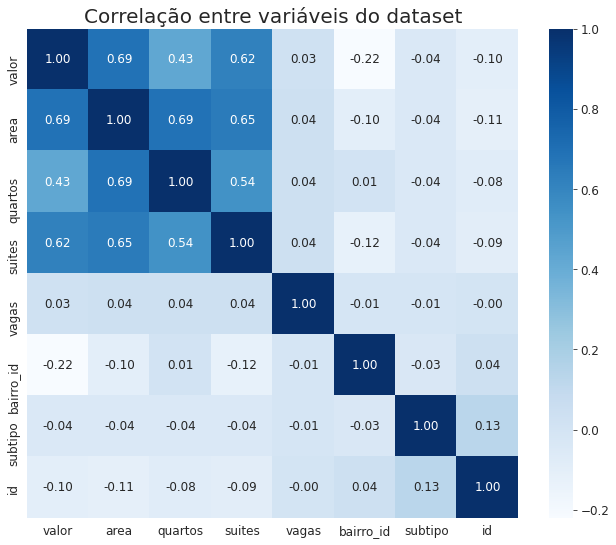

In [77]:
# Configurando a figura
plt.figure(figsize=(11, 9))

# Plotando o mapa de calor com a matriz de correlação entre as variáveis
sns.heatmap(corr, annot = True,
            fmt = '.2f', cmap='Blues'
           )

# Configurando o título da figura
plt.title('Correlação entre variáveis do dataset', fontsize=20)

# Configurado a fonte
plt.rcParams.update({'font.size': 12})

# Mostrando a figura
plt.show()

---
# 2.0 Preparação dos dados
- Analisando e resolvendo algumas inconsitências

## 2.1 Na variável 'quartos'

### Observando mas de perto a variável quartos, notamos que existem apartamentos com nenhum quarto. Até aí tudo bem, pois poderia ser um kitnet, por exemplo, onde quarto e sala se fundem.

In [10]:
# Fazendo um checkpoint com uma cópia dos dados
data2 = data.copy()

# Observando quais são os números de quartos existentes em nosso dataset
data2['quartos'].unique()

array([2, 4, 3, 1, 6, 5, 0, 8])

In [11]:
# Observando mais de perto quais são esses apartamentos com zero quartos
quarto_zerado = data2[(data2['quartos'] == 0)]
quarto_zerado

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
3758,2500,122,0,0,0,110,VL STA CATARINA,Sao Paulo,1,1,8680004
6743,2670,45,0,0,0,41,JARDINS,Sao Paulo,1,1,7801228
8279,8500,180,0,0,0,41,JARDINS,Sao Paulo,1,1,9624989
17889,2400,100,0,0,2,16,MOOCA,Sao Paulo,1,1,9587770
18997,700,30,0,0,0,42,BELA VISTA,Sao Paulo,1,1,9576508
21225,8000,138,0,0,2,3,BROOKLIN,Sao Paulo,1,1,9067825
22120,800,40,0,0,0,51,STA CECÍLIA,Sao Paulo,1,1,9610085
22727,2800,113,0,0,0,49,HIGIENÓPOLIS,Sao Paulo,1,1,7806634


### Porém, apenas um desses apartamentos com zero quartos tem uma área pequena (30m²), os demais tem uma área muito grande para ser uma kitnet. O que nos leva a pensar que pode ser um erro de digitação no nosso dataset.
### Vamos considerar esse apartamento de 30m² como sendo um kitnet e mantendo ele com zero quartos.

In [12]:
# Selecionando os apartamentos com zero quartos
quarto_zerado = quarto_zerado[quarto_zerado['area'] != 30]

# Mostrando quais são esses apartamentos
quarto_zerado

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
3758,2500,122,0,0,0,110,VL STA CATARINA,Sao Paulo,1,1,8680004
6743,2670,45,0,0,0,41,JARDINS,Sao Paulo,1,1,7801228
8279,8500,180,0,0,0,41,JARDINS,Sao Paulo,1,1,9624989
17889,2400,100,0,0,2,16,MOOCA,Sao Paulo,1,1,9587770
21225,8000,138,0,0,2,3,BROOKLIN,Sao Paulo,1,1,9067825
22120,800,40,0,0,0,51,STA CECÍLIA,Sao Paulo,1,1,9610085
22727,2800,113,0,0,0,49,HIGIENÓPOLIS,Sao Paulo,1,1,7806634


### Já os demais termos que dar um jeito nisso. Por isso, vamos tentar estimar o número de quartos através do tamanho (área) do apartamento observando os demais dados.

In [0]:
# Criando um laço que itera por todas as áreas dos apartamentos com zero quartos 
#   e substitui o zero no número de quarto pelo maior número de quartos de todos
#   os outros apartamentos com a mesma área
for i in quarto_zerado['area'].iteritems():
    area = i[1]
    data2['quartos'].loc[i[0]] = int(data2[data2['area'] == area]['quartos'].max())

In [14]:
# Mostrando que agora temos apenas aquele kitinet com zero quartos
data2[(data2['quartos'] == 0)]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
18997,700,30,0,0,0,42,BELA VISTA,Sao Paulo,1,1,9576508


## 2.2 Na variável 'area'

### 2.2.1 Encontrando algumas inconsistências

#### Olhando mais afundo a variável 'area'

In [15]:
# Mostrando todos os valores de área registrado no dataset
data2['area'].unique()

array([ 57, 143, 140,  70,  80, 110, 200,  56,  43, 213,  90, 150,  51,
       193,  76, 136,  74,  34,  44,  83, 220,  65, 130,  87,  64, 141,
        66,  63, 182, 146,  68, 112, 124,  59,  48,  37,  33,  78, 138,
        50,  60, 246,  93,  82,  69,  95, 127, 118,  55,  46,  85, 111,
        45, 288, 165, 205,  47, 171,  49,  52, 187, 180,  91,  54,  35,
        40,  96, 120,  42, 231,  79,  81,  88, 115, 228, 125, 151,  41,
       103,  86,  39, 135,  62, 100,  38, 161,  72, 208,  75, 210,  84,
        58, 268, 106,  98, 306, 101,  97, 270,  30,  53, 242,  73, 129,
       128, 160, 491, 280, 117, 277,  71, 162, 170,  67, 102, 223, 320,
       250, 145, 142,  36, 105, 244, 245, 168, 222, 122, 197,  61, 147,
       188, 329, 230, 175, 176, 159,  89, 163, 126, 209, 177, 134, 121,
       131, 190, 241,  92,  77, 196, 113, 184, 225, 240, 289, 309, 166,
       185, 207, 186, 264, 189, 237, 114,  31, 218, 199, 215, 173, 430,
       183, 167, 116, 346, 206, 172, 198, 139, 260, 107, 119, 19

#### Observando com mais atenção a variável área, notamos que temos um problema pela frente aqui também. São eles:

- Existem alguns apartamentos com área zero. Isso não faz sentido e precisamos dar um jeito nisso.

In [16]:
# Mostrando todos os apartamentos com área zero
data2[data2['area'] == 0]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
10285,1700,0,3,1,2,16,MOOCA,Sao Paulo,1,2,9575472
20467,1400,0,3,0,1,73,FREGUESIA DO Ó,Sao Paulo,1,2,9604609
20780,3500,0,1,0,1,3,BROOKLIN,Sao Paulo,1,2,9592144
23224,2900,0,1,0,1,27,AV PAULISTA,Sao Paulo,1,2,9592142
28156,1700,0,1,0,0,23,CERQUEIRA CÉSAR,Sao Paulo,1,2,9636363
28168,1100,0,2,1,1,124,VL CARRÃO,Sao Paulo,1,1,9591566
28178,1300,0,2,0,0,55,CAMBUCI,Sao Paulo,1,1,9634200
28191,2500,0,2,0,1,6,JD PAULISTA,Sao Paulo,1,2,9617319
28209,1300,0,1,0,0,8,CONSOLAÇÃO,Sao Paulo,1,1,9591745
28223,2300,0,2,1,2,69,REAL PARQUE,Sao Paulo,1,2,9427670


- Temos também um apartamento com 10m² de área com 3 suítes. Claramente um erro de digitação (talvez deveria ser 100m²).

In [17]:
# Mostrando todos os apartamentos com área igual a 10m²
data2[data2['area'] == 10]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
6694,900,10,2,0,1,299,VL SILVIA,Sao Paulo,1,2,9516685
9922,4500,10,3,3,2,2,ITAIM BIBI,Sao Paulo,1,1,9544863
9991,1200,10,2,0,1,234,CANGAÍBA,Sao Paulo,1,1,9406419
23753,1100,10,2,0,1,429,ENG GOULART,Sao Paulo,1,2,9399558
24717,1500,10,2,0,1,234,CANGAÍBA,Sao Paulo,1,1,9407256
24745,1600,10,2,0,1,17,TATUAPÉ,Sao Paulo,1,1,9407812
27085,1500,10,2,0,1,234,CANGAÍBA,Sao Paulo,1,1,9406530


- E por fim, temos um apartamento com área de 1m². apesar de ter apenas um quarto, não acredito que seja uma área válida.

In [18]:
# Mostrando todos os apartamentos com área igual a 1m²
data2[data2['area'] == 1]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
28310,1800,1,1,0,1,23,CERQUEIRA CÉSAR,Sao Paulo,1,1,9591743


- Um apartamento com 15m² de área com 4 quartos, sendo 2 suítes.
- Vamos considerar um erro de digitação também (talzez fosse 150m² ?).

In [19]:
# Mostrando todos os apartamentos com área igual a 15m²
data2[data2['area'] == 15]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
4806,750,15,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,9143698
9547,500,15,1,1,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,2,9311617
16479,5000,15,4,2,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7903745
22512,1400,15,2,0,1,186,ITAQUERA,Sao Paulo,1,1,8362734
26217,750,15,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,8594064
26828,850,15,2,0,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7862439


### 2.2.2 Tratando das inconsistências

#### Apartamentos com área de 0m²

In [20]:
# Selecionando os apartamentos com área zero
area_zero = data2[(data2['area'] == 0)]

# Mostrando quais são esses apartamentos
area_zero

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
10285,1700,0,3,1,2,16,MOOCA,Sao Paulo,1,2,9575472
20467,1400,0,3,0,1,73,FREGUESIA DO Ó,Sao Paulo,1,2,9604609
20780,3500,0,1,0,1,3,BROOKLIN,Sao Paulo,1,2,9592144
23224,2900,0,1,0,1,27,AV PAULISTA,Sao Paulo,1,2,9592142
28156,1700,0,1,0,0,23,CERQUEIRA CÉSAR,Sao Paulo,1,2,9636363
28168,1100,0,2,1,1,124,VL CARRÃO,Sao Paulo,1,1,9591566
28178,1300,0,2,0,0,55,CAMBUCI,Sao Paulo,1,1,9634200
28191,2500,0,2,0,1,6,JD PAULISTA,Sao Paulo,1,2,9617319
28209,1300,0,1,0,0,8,CONSOLAÇÃO,Sao Paulo,1,1,9591745
28223,2300,0,2,1,2,69,REAL PARQUE,Sao Paulo,1,2,9427670


#### Vamos tentar fazer o mesmo que fizemos com os quartos zerados agora com a área, ou seja, tentaremos estimar a área (atualmente zero) do apartamento através do número de quartos observando os demais dados.

In [0]:
# Criando um laço que itera por variável 'quartos' de todos os apartamentos com 
#   zero quartos e substitui o zero (no número de quarto) pela média do número de 
#   quartos de todos os outros apartamentos com a mesma área
for i in area_zero['quartos'].iteritems():
    quartos = i[1]
    data2['area'].loc[i[0]] = int(data2[data2['quartos'] == quartos]['area'].mean())

In [22]:
# Mostrando que agora não temos mais apartamentos com área igual a zero
data2[(data2['area'] == 0)]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id


#### Apartamento com área de 10m² e 3 suítes trocaremos para 100m².

In [0]:
# Selecionando o apartamento com área 10m² e 3 suítes
area_dez = data2.query("area == 10 & suites == 3")

# Armazenando o id desse apartamaneto
id_area_dez = area_dez['id'].values[0]

# Trocando para 100m² a área desse aprtamento
data2['area'].loc[area_dez.index] = 100

In [24]:
# Mostrando que agora a área dele é 100m²
data2.query(f"id == {id_area_dez}")

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
9922,4500,100,3,3,2,2,ITAIM BIBI,Sao Paulo,1,1,9544863


#### Apartamento com área de 1m²
- Aqui, resolvemos trocar essa área de 1m² pela média das áreas dos apartamentos com as mesmas espscificações que este.

In [25]:
# Selecionando o apartamento com área de 1m²
area_um = data2[data2['area'] == 1]

# Armazenado o id do apartamento com área igual a um para uso futuro
id_area_um = data2[data2['area'] == 1]['id'].values[0]

# Mostrando qual é esse apartamento
area_um

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
28310,1800,1,1,0,1,23,CERQUEIRA CÉSAR,Sao Paulo,1,1,9591743


In [0]:
# Armazenando a área média de todos os apartamentos com as mesmas especificacões daquele com a área igual a 1m²
nova_area = data2.query('quartos == 1 & suites == 0 & vagas == 0 & bairro == "CERQUEIRA CÉSAR"')['area'].mean()

# Trocando a área de 1m² pela média das áreas dos apartamentos com as mesmas especificações
data2['area'].loc[area_um.index] = nova_area

In [27]:
# Mostrando que agora não temos mais apartamentos com área igual a 1m²
data2[data2['area'] == 1]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id


#### Apartamentos com área de 15m²

In [28]:
# Selecionando todos os apartamentos com área igual a 15m²
area_quinze = data2[data2['area'] == 15]

# Mostrando quais são esses apartamentos
area_quinze

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
4806,750,15.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,9143698
9547,500,15.0,1,1,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,2,9311617
16479,5000,15.0,4,2,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7903745
22512,1400,15.0,2,0,1,186,ITAQUERA,Sao Paulo,1,1,8362734
26217,750,15.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,8594064
26828,850,15.0,2,0,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7862439


#### O apartamento de Itaquera
- 15m² com 2 quartos parece estranho. Vamos olhar mais de perto para apartamentos com as mesmas especificações que esse.

In [29]:
# Procurando todos os apartamentos com as mesmas especificações
data2.query('quartos == 2 & suites == 0 & vagas == 1 & bairro == "ITAQUERA"')

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
1881,1000,48.0,2,0,1,186,ITAQUERA,Sao Paulo,1,2,8718975
3914,1000,54.0,2,0,1,186,ITAQUERA,Sao Paulo,1,2,5983685
5917,1500,60.0,2,0,1,186,ITAQUERA,Sao Paulo,1,2,8948548
7003,855,50.0,2,0,1,186,ITAQUERA,Sao Paulo,1,4,9635264
8510,1300,54.0,2,0,1,186,ITAQUERA,Sao Paulo,1,4,9209549
9432,800,48.0,2,0,1,186,ITAQUERA,Sao Paulo,1,1,9460891
12077,1100,50.0,2,0,1,186,ITAQUERA,Sao Paulo,1,2,6630382
15357,750,42.0,2,0,1,186,ITAQUERA,Sao Paulo,1,2,7267750
17823,1200,45.0,2,0,1,186,ITAQUERA,Sao Paulo,1,2,8718994
19972,1000,49.0,2,0,1,186,ITAQUERA,Sao Paulo,1,2,5585799


In [30]:
# Mostrando as estatísitcas da variável 'area' para todos os apartamentos com as especificações de interesse
data2.query('quartos == 2 & suites == 0 & vagas == 1 & bairro == "ITAQUERA"')['area'].describe()

count    18.000000
mean     49.333333
std      10.134391
min      15.000000
25%      48.000000
50%      50.000000
75%      54.750000
max      62.000000
Name: area, dtype: float64

#### Podemos ver que todos os apartamentos com 2 quartos, 0 suítes, 1 vaga de garagem e localizado em Itaquera, um bairro da periferia da cidade, tem áreas em torno de 50m², mesmo incluindo àquele de área 15m².
#### Então é o valor da mediana (50m²) que iremos atribuir àquele apartamento com comportamento anômalo.

In [0]:
# Armazenando o apartamento com comportamento anômalo
itaquera_area_quinze = area_quinze.query('bairro == "ITAQUERA"')

# Armazenando o índice desse apartamento
index_itaquera = itaquera_area_quinze.index.values[0]

# Calculando a nova área
nova_area = data2.query('quartos == 2 & suites == 0 & vagas == 1 & bairro == "ITAQUERA"')['area'].median()

# Trocando a área para 50m²
data2['area'].loc[itaquera_area_quinze.index] = nova_area

In [32]:
# Mostrando que agora não temos mais aquele apartamento de Itaquera com área 15m²
data2[data2['area'] == 15]

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
4806,750,15.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,9143698
9547,500,15.0,1,1,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,2,9311617
16479,5000,15.0,4,2,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7903745
26217,750,15.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,8594064
26828,850,15.0,2,0,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7862439


In [33]:
# Mostrando que a nova área dele é 50m².
data2['area'].loc[index_itaquera]

50.0

#### Os dois apartamentos de Guaianazes
- 15m² com 2 quartos parece estranho. Vamos olhar mais de perto para apartamentos com as mesmas especificações que esse.

#### Com esses dois apartamentos, gostaríamos de fazer o mesmo que fizemos com o de Itaquera Porém, só exeistem esses dois apartamentos em nosso dataset, oq eu inviabiliza o processo.

In [34]:
# Procurando todos os apartamentos com as mesma especificações
data2.query('bairro == "GUAIANAZES"')

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
4806,750,15.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,9143698
26217,750,15.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,8594064


#### Vamos então fazer o mesmo processo que anteriormente, porém utilizando apartamentos de uma região vizinha. Com isso não perderemos tanta informação já que, em regiões próximas, os valores dos apartamentos não são muito discrepantes uns dos outros.
#### Utilizaremos o bairro de Artur Alvim, que têm o mesmo perfil desses dois de Guaianazes

In [35]:
# Selecionando todos os apartamentos com as especificações que queremos
data2.query('quartos == 2 & suites == 0 & vagas == 1 & bairro == "ARTUR ALVIM"')

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
3602,850,48.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,1,9476412
6256,825,57.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,4,9635487
7849,800,47.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,4,8166495
12414,850,46.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,1,9141953
15825,855,48.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,1,9429313
16324,1050,49.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,1,9613111
18761,835,48.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,4,7564726
20522,845,57.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,4,9635453
25524,765,48.0,2,0,1,129,ARTUR ALVIM,Sao Paulo,1,4,8810550


In [36]:
# Mostrando as estatisticas descritivas dos apartamentos com as especificações citadas
data2.query('quartos == 2 & suites == 0 & vagas == 1 & bairro == "ARTUR ALVIM"')['area'].describe()

count     9.000000
mean     49.777778
std       4.176655
min      46.000000
25%      48.000000
50%      48.000000
75%      49.000000
max      57.000000
Name: area, dtype: float64

#### Podemos ver que aqui a área desses apartamentos de Artur Alvim estão em torno de 48 a 49m².
#### Então, utilizaremos novamente a mediana (48m²).

In [37]:
# Armazenando os dois apartamentos com comportamentos anômalos
guaianazes_area_quinze = area_quinze.query('bairro == "GUAIANAZES"')

# Armazenando os índices desses dois apartamentos
index_guaianazes = guaianazes_area_quinze.index.values

# Calculando a nova área
nova_area = data2.query('quartos == 2 & suites == 0 & vagas == 1 & bairro == "ARTUR ALVIM"')['area'].median()

# Trocando a área para 48m²
for i in index_guaianazes:
    data2['area'].loc[i] = nova_area

# Mostrando que a novas áreas para os dois apartamentos de Guaianazes deixam de ser 15m² e passam a ser 48m²
data2.query('bairro == "GUAIANAZES"')

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
4806,750,48.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,9143698
26217,750,48.0,2,0,1,261,GUAIANAZES,Sao Paulo,1,1,8594064


In [38]:
# Mostrando que agora não temos mais os dois apartamentos de Guaianazes com área 15m²
bonifacio_quinze = data2[data2['area'] == 15]
bonifacio_quinze

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
9547,500,15.0,1,1,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,2,9311617
16479,5000,15.0,4,2,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7903745
26828,850,15.0,2,0,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7862439


#### Agora o maior dos problemas com os apartamentos de 15m². Esses 3 do Cj. Residencial José Bonifácio.
#### Note que os três são do mesmo conjunto residencial, a saber, localizado também na periferia da cidade e, coincidentemente, localizado entre os dois bairros com problemas que acabamos de trabalhar: Itaquera e Guaianazes. Entretando, os três com especificações diferentes entre si, sendo um deles com um aluguel bem acima dos demais da região.

#### O primeiro dos três, vamos deixá-lo como está, pois acreditamos que, mesmo com 1 quarto e uma suíte, essa área não seria uma problema se ele for uma kitnet. Como não temos como saber isso, deixemos assim e um dos problemas já está resolvido.

In [0]:
# Retirando a possível kitnet
bonifacio_quinze.drop(bonifacio_quinze[bonifacio_quinze['quartos'] == 1].index, inplace=True)

In [40]:
# Mostrando os apartamentos do Cj. Residencial José Bonifácio que restaram
bonifacio_quinze

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
16479,5000,15.0,4,2,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7903745
26828,850,15.0,2,0,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7862439


#### Dos dois que sobraram, vamos primeiramente resolver esse de 2 quartos. Utilizaremos o mesmo método que usamos anteriormente naquele de Itaquera.

In [41]:
# Procurando todos os apartamentos com especificações semelhantes
data2.query('quartos == 2 & bairro == "CJ RESID JOSE BONIFACIO"')

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
1607,900,46.0,2,1,1,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,9549704
6067,750,52.0,2,0,1,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,9224408
13355,1000,48.0,2,0,1,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,9461047
14988,900,52.0,2,0,1,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,9634765
26828,850,15.0,2,0,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7862439


In [42]:
# Mostrando as estatísitcas da variável 'area' para todos os apartamentos com as especificações de interesse
data2.query('quartos == 2 & bairro == "CJ RESID JOSE BONIFACIO"')['area'].describe()

count     5.000000
mean     42.600000
std      15.646086
min      15.000000
25%      46.000000
50%      48.000000
75%      52.000000
max      52.000000
Name: area, dtype: float64

#### Aqui a área desses imóveis estão em torno de 48m², então será esse o valor utilizado.

In [43]:
# Armazenando os índices desses dois apartamentos
index_ap = bonifacio_quinze.iloc[1:, :].index.values[0]

# Calculando a nova área
nova_area = data2.query('quartos == 2 & bairro == "CJ RESID JOSE BONIFACIO"')['area'].median()

# Trocando a área para 48m²
data2['area'].loc[index_ap] = nova_area

# Mostrando que a nova área agora é 48m²
data2.query(f'index == {index_ap}')

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
26828,850,48.0,2,0,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7862439


#### Nos resta agora resolver o último de nossos problemas.

In [44]:
# Atualizando a variável 'bonifacio_quinze' que agora deve conter apenas um apartamentos com área 15m². Aquele com problemas.
bonifacio_quinze = data2[data2['area'] == 15].iloc[1:, :]
bonifacio_quinze

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
16479,5000,15.0,4,2,0,167,CJ RESID JOSE BONIFACIO,Sao Paulo,1,1,7903745


#### Esse apartamento se apresenta todo estranho. O valor de seu aluguel é muito acima do demais que se localizam no mesmo conjunto residencial

In [45]:
# Armazenando o index desse apartamento todo estranho
index_ap_estranho = bonifacio_quinze.index.values[0]

# Mostrando as estatísticas descritivas de todos os apartamentos do Cj. Residencial José Bonifácio (sem o apartamento estranho)
data2.query('bairro == "CJ RESID JOSE BONIFACIO"').drop(index_ap_estranho).describe()

,valor,area,quartos,suites,vagas,bairro_id,tipo,subtipo,id
count,8.000000,8.000000,8.00000,8.00000,8.00000,8.0,8.0,8.000000,8.000000e+00
mean,825.000000,46.625000,2.12500,0.25000,0.75000,167.0,1.0,1.125000,9.267924e+06
std,151.185789,13.298093,0.64087,0.46291,0.46291,0.0,0.0,0.353553,5.842284e+05
min,500.000000,15.000000,1.00000,0.00000,0.00000,167.0,1.0,1.000000,7.862439e+06
25%,787.500000,47.500000,2.00000,0.00000,0.75000,167.0,1.0,1.000000,9.289815e+06
50%,875.000000,50.000000,2.00000,0.00000,1.00000,167.0,1.0,1.000000,9.505372e+06
75%,900.000000,53.000000,2.25000,0.25000,1.00000,167.0,1.0,1.000000,9.549706e+06
max,1000.000000,56.000000,3.00000,1.00000,1.00000,167.0,1.0,2.000000,9.634765e+06


#### Os valores das variáveis 'valor', 'quartos' e 'suites' do apartamento estranho estão todos acima, (não só da média e da mediana, mas também do valor máximo) dos demais que se localizam no mesmo conjunto residencial. E era de se esperar que não houvessem diferenças muito grandes entre esses valores.
#### E por isso, consideramos que esse apartamento deve ser excluído por se tratar de um apartamento que foge completamente do padrão dos demais da vizinhança.

In [46]:
# Retirando o apartamento estranho de nosso dataset e salvando um novo checkpoint
data3 = data2.drop(index_ap_estranho).reset_index().drop('index', axis=1)

# Mostrando o dataset preparado
data3

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
0,1600,57.0,2,0,1,1,VL DA SAUDE,Sao Paulo,1,3,9165861
1,5600,143.0,4,1,2,2,ITAIM BIBI,Sao Paulo,1,3,8657016
2,3000,140.0,3,1,1,3,BROOKLIN,Sao Paulo,1,2,9245580
3,4000,70.0,2,1,1,4,CAMPO BELO,Sao Paulo,1,2,8788916
4,2500,80.0,2,1,2,5,PERDIZES,Sao Paulo,1,1,9257792
...,...,...,...,...,...,...,...,...,...,...,...
28873,1800,70.0,2,1,1,327,VL POLOPOLI,Sao Paulo,1,2,9645207
28874,1200,60.0,2,0,1,130,VL BUTANTÃ,Sao Paulo,1,4,9645215
28875,2600,90.0,3,1,2,99,TUCURUVI,Sao Paulo,1,2,7727709
28876,2200,82.0,3,1,1,95,VL SÔNIA,Sao Paulo,1,2,9645107


#### E com o dataset devidamente preparado, vamos aos modelos de machine learning

---
# 3.0 Modelos de Machine Learning

In [0]:
# Importando mais algumas bibliotecas necessárias para criar e avaliar nossos modelos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import mean_squared_error as mse

In [0]:
# Selecionando as variáveis explicativas e a variável alvo
X = data3.drop(['valor', 'bairro', 'cidade', 'id', 'tipo', 'subtipo'], axis=1)
y = data3['valor']

## 3.1 Definindo uma baseline
- Antes de fazermos os modelos de machine learning, vamos é preciso definir uma baseline.
- Ela serve para termos um marco no projeto, permitindo assim um fácil entendimento do que será feito nas próximos passos.
- Essa baseline é uma espécie de referência e serve também como meta a ser batida pelos nossos modelos de machine learning.

#### Nossa baseline será definida pela média dos valores de aluguel categorizados por como 'Pequeno', 'Médio', 'Grande' e 'Muito Grande' de acordo com a sua área.

In [0]:
# Definindo a regra para categorizar os dados
categorias = []

# Alimentando a lista categorias
for i in data3['area'].iteritems():
    valor = (i[1])
    if valor <= 60:
        categorias.append('Pequeno')
        
    elif valor > 60 and valor <= 90:
        categorias.append('Medio')
        
    elif valor > 90 and valor <= 150:
        categorias.append('Grande')
        
    else:
        categorias.append('Muito Grande')

In [50]:
# Criando a coluna categorias
data3['categorias'] = categorias

# Imprimindo a contagem de categorias
data3.categorias.value_counts()

Medio           9090
Pequeno         7921
Grande          7447
Muito Grande    4420
Name: categorias, dtype: int64

In [51]:
# Visualizando as cinco primeiras linhas do dataset atualizado
data3.head()

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id,categorias
0,1600,57.0,2,0,1,1,VL DA SAUDE,Sao Paulo,1,3,9165861,Pequeno
1,5600,143.0,4,1,2,2,ITAIM BIBI,Sao Paulo,1,3,8657016,Grande
2,3000,140.0,3,1,1,3,BROOKLIN,Sao Paulo,1,2,9245580,Grande
3,4000,70.0,2,1,1,4,CAMPO BELO,Sao Paulo,1,2,8788916,Medio
4,2500,80.0,2,1,2,5,PERDIZES,Sao Paulo,1,1,9257792,Medio


In [52]:
# Agrupando as categorias e calculando a média dos valores de aluguel de cada uma
medias_categorias = data3.groupby(by='categorias')['valor'].mean()

# Visualizando a variável medias_categorias
medias_categorias

categorias
Grande          4073.206123
Medio           2707.809681
Muito Grande    6391.801810
Pequeno         2190.966166
Name: valor, dtype: float64

In [53]:
# Criando um dicionario com chaves pequeno, medio e grande e suas respectivas médias
dic_baseline = {'Pequeno': medias_categorias[3], 
                'Medio': medias_categorias[1], 
                'Grande': medias_categorias[0], 
                'Muito Grande': medias_categorias[2]}

# Imprimindo dicionario
dic_baseline

{'Grande': 4073.2061232711158,
 'Medio': 2707.809680968097,
 'Muito Grande': 6391.801809954751,
 'Pequeno': 2190.9661658881455}

In [0]:
# Criando a função retorna_baseline()
def retorna_baseline(area):
    if area <= 60:
        return dic_baseline.get('Pequeno')
    
    elif area > 60 and area <= 90:
        return dic_baseline.get('Medio')
    
    elif area > 90 and area <= 150:
        return dic_baseline.get('Grande')
    
    else:
        return dic_baseline.get('Muito Grande')

In [0]:
# Criando laço para visualizar as informações recém criadas
for i in data['area'].iteritems():
    index = i[0]
    area = i[1]
    valor_medio = retorna_baseline(area).round(2)
    
    # Imprimindo cada um apenas para conferência
    #print(f'A área do apartamento {index} é {area}m² e o seu respectivo valor médio é de R${valor_medio}')

In [0]:
# Preparando a variável explicativa do nosso baseline
X = data3.drop(['valor', 'bairro', 'cidade', 'id', 'tipo', 'subtipo', 'categorias'], axis=1)

# Preparando a nossa variável alvo
y = data3['valor']

#### Separando os conjuntos de treino e teste

In [57]:
# Importando o método train_test_split da biblioteca sklearn.model_selection
from sklearn.model_selection import train_test_split

# Dividindo os dados entre o conjunto de treino (70%) e de teste (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Imprimindo a quantidade de linhas de cada conjunto
print ('Número de linhas de X_train: {}'.format(X_train.shape))
print ('Número de linhas de X_test: {}'.format(X_test.shape))
print ('Número de linhas de y_train: {}'.format(y_train.shape))
print ('Número de linhas de y_test: {}'.format(y_test.shape))

Número de linhas de X_train: (20214, 5)
Número de linhas de X_test: (8664, 5)
Número de linhas de y_train: (20214,)
Número de linhas de y_test: (8664,)


In [0]:
# Criando uma lista vazia para armazenar 
predicoes = []

# Para cada elemento do X_teste['area'] alimentar a lista 'predicoes'
for i in X_test['area'].iteritems():
    area = i[1]
    predicoes.append(retorna_baseline(area))

In [59]:
# Visualizando os 10 primeiros resultados da lista predições
predicoes[:10]

[2707.809680968097,
 2190.9661658881455,
 6391.801809954751,
 6391.801809954751,
 2707.809680968097,
 2707.809680968097,
 2190.9661658881455,
 2707.809680968097,
 2190.9661658881455,
 6391.801809954751]

## 3.2 Atribuindo os resultados a um dataframe

- Manteremos um log ao longo do projeto com o intuito de observar a evolução dado o baseline.

In [60]:
# Criando um DataFrame vazio
df_results = pd.DataFrame()

# Adicionando a coluna valor_real
df_results['valor_real'] = y_test.values

# Criando a coluna 'valor_predito_baseline' com as "predicoes" do baseline
df_results['valor_predito_baseline'] = predicoes

# Imprimindo as 10 primeiras linhas do DataFrame df_results
df_results.head(10)

,valor_real,valor_predito_baseline
0,3850,2707.809681
1,2700,2190.966166
2,10000,6391.801810
3,3500,6391.801810
4,1800,2707.809681
5,1800,2707.809681
6,1500,2190.966166
7,1280,2707.809681
8,7300,2190.966166
9,7000,6391.801810


In [0]:
# Importando a métrica rmse
from sklearn.metrics import mean_squared_error

In [0]:
# Calculando a métrica Root Mean Square Error (rmse)
rmse = (np.sqrt(mean_squared_error(y_test, predicoes)))

# Criando duas listas vazias para armazenar o erro e o nome do modelo
modelos = []
erros = []

# Adicionando o nome do modelo e seus respectivo erro
modelos.append('Baseline')
erros.append(rmse)

In [63]:
# Imprimindo a performance do modelo
print ('Performance do modelo baseline:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo baseline:

RMSE é: 1488.6510330259773 


## 3.3 Linear Regression
- Devido a correlação entre algumas features podemos usar uma regressão linear.
- É um modelo simples, eficiente, de solução rápida e robusta.

In [0]:
# Carregando o pacote LinearRegression
from sklearn.linear_model import LinearRegression

# Criando o objeto do tipo LinearRegression
lin_model = LinearRegression()

# Treinando o algoritmo de regressão linear
lin_model.fit(X_train, y_train)

# Avaliando o modelo nos dados de teste
y_pred = lin_model.predict(X_test)

#### Avaliando o modelo

In [65]:
# Calculando a métrica Root Mean Square Error (rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

# # Adicionando o nome do modelo e seus respectivo erro
modelos.append('Linear Regression')
erros.append(rmse)

# Imprimindo a performance do modelo
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 1375.22293147335 


In [66]:
# Atribui os valores preditos da Linear Regression no DataFrame df_results
df_results['valor_predito_reg_linear'] = lin_model.predict(X_test)

# Mostrando as 5 primeiras linhas dos DataFrame df_results
df_results.head()

,valor_real,valor_predito_baseline,valor_predito_reg_linear
0,3850,2707.809681,2709.189440
1,2700,2190.966166,2956.586743
2,10000,6391.801810,6026.858128
3,3500,6391.801810,6533.356630
4,1800,2707.809681,2603.860166


## 3.4 Decision Tree

- Podemos usar também o modelo Decision Tree.
- É um algoritmo de aprendizado supervisionado.
- Simples.
- Explicabilidade do Modelo.

In [0]:
# Importando o pacote DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Criando um objeto do tipo DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Treinando o algoritmo
regressor.fit(X_train, y_train)

# Fazendo as previsões
y_pred = regressor.predict(X_test)

In [68]:
# Atribuindo os valores preditos da DecisionTreeRegressor no DataFrame df_results
df_results['valor_predito_arvore'] = y_pred

# Visualizando o DataFrame df_results
df_results.head()

,valor_real,valor_predito_baseline,valor_predito_reg_linear,valor_predito_arvore
0,3850,2707.809681,2709.189440,2380.0
1,2700,2190.966166,2956.586743,2700.0
2,10000,6391.801810,6026.858128,10000.0
3,3500,6391.801810,6533.356630,5500.0
4,1800,2707.809681,2603.860166,950.0


#### Avaliando o modelo Decision Tree

In [69]:
# Calculando a métrica Root Mean Square Error (rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprimindo a performance do modelo
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

# Adicionando o nome do modelo e seus respectivo erro
modelos.append('Decision Tree Regressor')
erros.append(rmse)

Performance do modelo avaliado com os dados de teste:

RMSE é: 1309.5294780378094 


## 3.5 Random Forest

- Método Ensemble.
- Mais robusto.

In [0]:
# Importando o método RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Criando o objeto rf_regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Treinando o algoritmo de Random Forest
rf_regressor.fit(X_train, y_train)

# Avaliando o modelo nos dados de teste
y_pred = rf_regressor.predict(X_test)

# Adicionando os resultados no DataFrame df_results
df_results['valor_predito_random_forest'] = rf_regressor.predict(X_test)

#### Avaliando o modelo Random Forest

In [71]:
# Calculando a métrica Root Mean Square Error (rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprime a performance do modelo
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {:.0f} '.format(rmse))

modelos.append('Random Forest Regressor')
erros.append(rmse)

Performance do modelo avaliado com os dados de teste:

RMSE é: 1082 


## 3.6 Comparando os erros

In [72]:
df_erros = pd.DataFrame()
df_erros['Modelos'] = modelos
df_erros['Erros (RMSE)'] = erros
df_erros.set_index('Modelos', inplace=True)
df_erros

,Erros (RMSE)
Modelos,
Baseline,1488.651033
Linear Regression,1375.222931
Decision Tree Regressor,1309.529478
Random Forest Regressor,1081.771714


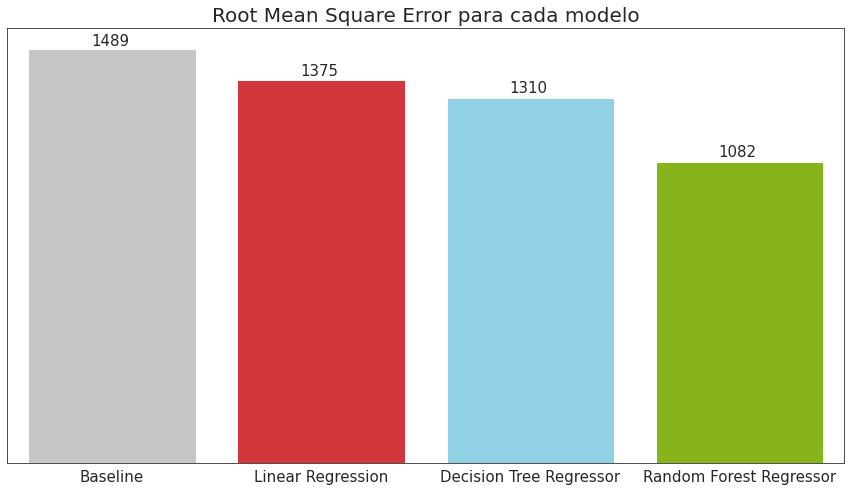

In [79]:
# Configurando o estilo
sns.set_style('white')

# Configurando o tamanho da segunda figura
plt.figure(figsize=(15, 8))

# Definindo as cores
color = {'Baseline': '#C6C5CA',
         'Linear Regression': '#ED1C24',
         'Decision Tree Regressor': '#83D8F4',
         'Random Forest Regressor': '#91CC04'
        }

# Plotando o gráfico de barra com a seaborn
sns.barplot(x=df_erros.index, y=df_erros['Erros (RMSE)'], palette=color)

# Definindo o título
plt.title('Root Mean Square Error para cada modelo', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel('')

# Definindo o eixo vertical
plt.ylabel('')

# Configurando as ticks do eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Configurando o tamanho da fonte
plt.rcParams.update({'font.size': 15})

# Escrevendo os valores sobre as barras
plt.text(-0.1, 1500, '{:.0f}'.format(df_erros["Erros (RMSE)"][0]))
plt.text(0.9, 1390, '{:.0f}'.format(df_erros["Erros (RMSE)"][1]))
plt.text(1.9, 1330, '{:.0f}'.format(df_erros["Erros (RMSE)"][2]))
plt.text(2.9, 1100, '{:.0f}'.format(df_erros["Erros (RMSE)"][3]))

# Mostrando o gráfico
plt.show()

## 4.0 Deploy da Aplicação

#### Encontrado o modelo com o menos erro, vamos agora preparar os dados para deploy

In [74]:
# Juntando as variáveis 'bairro' e 'valor' às variáveis explicativas
X['bairro'] = data3['bairro']
X['valor'] = y


# Mostrando as 5 primeiras linhas do nossao dataset preparado para deploy
X.head()

,area,quartos,suites,vagas,bairro_id,bairro,valor
0,57.0,2,0,1,1,VL DA SAUDE,1600
1,143.0,4,1,2,2,ITAIM BIBI,5600
2,140.0,3,1,1,3,BROOKLIN,3000
3,70.0,2,1,1,4,CAMPO BELO,4000
4,80.0,2,1,2,5,PERDIZES,2500


In [0]:
# Salvando o dataset para deploy
X.to_csv('data_deploy.csv', index=False)